In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [0]:
dataset = pd.read_csv("sample_data/california_housing_train.csv")

In [24]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


In [25]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [27]:
dataset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


In [0]:
feature = dataset['median_income']
target_var = dataset['median_house_value']

**y = mx + c**

     where m = slope (or, weight = W)
           c = intercept (or, bias = b)
           x = feature
           y = predicted value of target_var
           
**e = mean {(y - t)^2}**

     where y = y(p){mpg predicted} 
           t = y(d) {mpg from dataset given i.e., target value} 
           
***Note:*** The grapah of the error function is convex. So, we can apply Gradient Descent Algo to get the minimum error
           
___________________________________________________________________________________________________

## Gradient Descent Algorithm (*Geometric Intuition*):
It is an iterative optimization algo with update eqn: x(i) = x(i-1) - r* {{∂f(x)/∂x}| @ x=x(i-1)}


Now in ***Linear Regression***, since we've to to minimize slope and intercept to minimize the error (or cost, or loss) function; we use: 

**m = m - {r*(∂(e)/∂(m))**

     where ∂(e)/∂(m)= ∂(mean((y-t)^2))/∂(m) 
                     = ∂(mean(mx+c-t)^2))/∂(m) 
                     = 2*mean(mx+c-t)* {∂(mx)/∂(m) + ∂(c-t)/∂(m)} 
                     = 2*mean(mx+c-t)* {x + 0} 
                     = 2*mean(mx+c-t)* (x) 
                     
 **c = c -{r*(∂(e)/∂(c))}**

     where ∂(e)/∂(c) = ∂(mean((y-t)^2))/∂(c) 
                     = ∂(mean(mx+c-t)^2))/∂(c) 
                     = 2*mean(mx+c-t)* {∂(mx)/∂(c)+∂(c)/∂(c)-∂(t)/∂(c)} 
                     = 2*mean(mx+c-t)* {0 + 1 -0} 
                     = 2*mean(mx+c-t)
                     
**e =  mean {(y-t)^2**

         if y = t, then e(min) = 0
         if y = 0, then e(max) = mean(t^2)
         
**poe (i.e., %_of_error) = {current error / {(e(max))^2} } * 100**

             = {current error / mean(t^2)} * 100 

             = {current error / mean(target^2)} * 100 

          [Note: this formual is for prediction, not classification]
          
**poa (i.e., %_of_accuracy) = 100 - poe**

In [0]:
def line(m,x,c):
  return m*x+c

def error(m,x,c,t):
  return np.mean((line(m,x,c) - t)**2)

def derivative_slope(m,x,c,t):
  return 2*np.mean((line(m,x,c) - t)*x)

def derivative_intercept(m,x,c,t):
  return 2*np.mean((line(m,x,c) - t))

def accuracy_prediction(current_error,t):
  return 100 - ((current_error/np.mean(t**2))*100)

Your Prediction Accuracy:  87.17062614181573 %


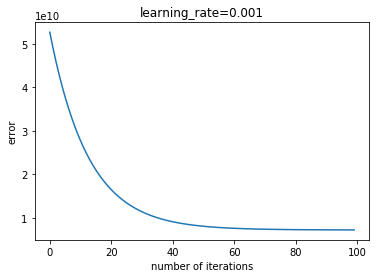

In [30]:
m = random.random()
c = random.random()
cost = []
iterations = 100
learning_rate = 0.001
for i in range(0,iterations):
  m = m - learning_rate * derivative_slope(m,feature,c,target_var)
  c = c - learning_rate * derivative_intercept(m,feature,c,target_var)
  
  cost.append(error(m,feature,c,target_var))

print("Your Prediction Accuracy: ", accuracy_prediction(error(m,feature,c,target_var),target_var),"%")
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("learning_rate=0.001")
plt.show()

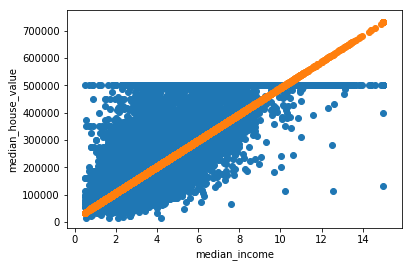

In [31]:
plt.scatter(feature,target_var)
predicted_answers = line(m,feature,c)
plt.scatter(feature, predicted_answers)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

Your Prediction Accuracy:  87.37536596387265 %


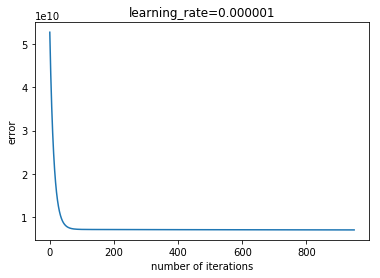

In [32]:
m = random.random()
c = random.random()
cost = []
iterations = 950
learning_rate = 0.001
for i in range(0,iterations):
  m = m - learning_rate * derivative_slope(m,feature,c,target_var)
  c = c - learning_rate * derivative_intercept(m,feature,c,target_var)
  
  cost.append(error(m,feature,c,target_var))

print("Your Prediction Accuracy: ", accuracy_prediction(error(m,feature,c,target_var),target_var),"%")
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("learning_rate=0.000001")
plt.show()

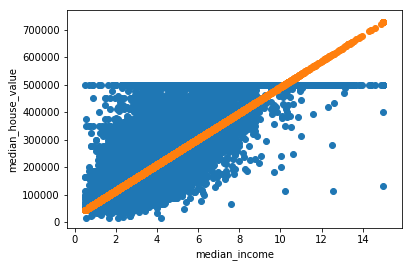

In [33]:
plt.scatter(feature,target_var)
predicted_answers = line(m,feature,c)
plt.scatter(feature, predicted_answers)
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

Your Prediction Accuracy:  47.33571269364586 %


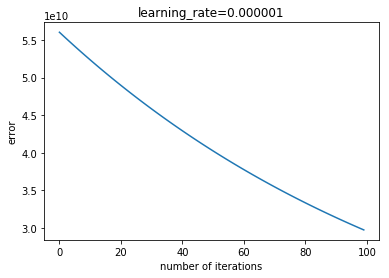

In [34]:
m = random.random()
c = random.random()
cost = []
iterations = 100
learning_rate = 0.0001
for i in range(0,iterations):
  m = m - learning_rate * derivative_slope(m,feature,c,target_var)
  c = c - learning_rate * derivative_intercept(m,feature,c,target_var)
  
  cost.append(error(m,feature,c,target_var))

print("Your Prediction Accuracy: ", accuracy_prediction(error(m,feature,c,target_var),target_var),"%")
plt.plot(cost)
plt.xlabel("number of iterations")
plt.ylabel("error")
plt.title("learning_rate=0.000001")
plt.show()

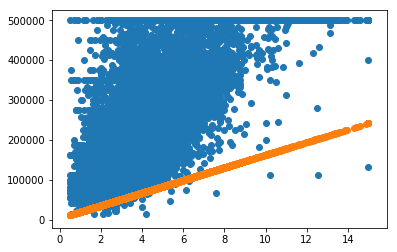

In [35]:
predicted_answers = line(m,feature,c)
plt.scatter(feature,target_var)
plt.scatter(feature, predicted_answers)
plt.show()